# DATA3406 Week 8 Mini-Assignment

Serena Gao

12-RED



---
## Part 1:  Some Pandas tutorials to run through

**Useful Things Learnt:**
- Pandas is VERY useful for reading and writing data, as well as manipulating data in time/space efficient ways. Since it builds off of numpy and matplotlib, there are a lot of inbuilt functionality for stats and graphing
- Matplotlib is great for more complicated custom graphs, and can be useful for EDA with pairplots and distribution plots.
- I???? Didn't ?? Know??? About??? `plt.subplot2grid`????? *Where has this been all my life*. It's a much more intuitive version of `plt.subplots()` and allows you to group conceptually similar plots together in one code cell 
- Seaborn heatmaps are a god at visualising correlation plots
- Altair!!! Would be very useful for zooming in and out on a plot to control the level of detail we want to look at

---

## Part 2: Hurdle Task for Assignment 2

Topic 3 comes with data for two users. The overarching goal of this part is to explore the intricacies of these two datasets, highlighting any caveats or potential issues, and mark any ideas for feature engineering.


Importing relevant packages and reading in the user data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
user1_raw_data = pd.read_csv("../data/User1.csv")
user2_raw_data = pd.read_csv("../data/User2.csv")

Now we print the dataframe and info for the User1 data to get an idea for what the structure of the data looks like.

In [3]:
user1_raw_data

,Start,Finish,Steps (count)
0,07-Dec-2014 09:00,07-Dec-2014 10:00,941.0
1,07-Dec-2014 10:00,07-Dec-2014 11:00,408.0
2,07-Dec-2014 11:00,07-Dec-2014 12:00,157.0
3,07-Dec-2014 12:00,07-Dec-2014 13:00,1017.0
4,07-Dec-2014 13:00,07-Dec-2014 14:00,0.0
...,...,...,...
42071,25-Sep-2019 07:00,25-Sep-2019 08:00,0.0
42072,25-Sep-2019 08:00,25-Sep-2019 09:00,0.0
42073,25-Sep-2019 09:00,25-Sep-2019 10:00,0.0
42074,25-Sep-2019 10:00,25-Sep-2019 11:00,0.0


In [4]:
user1_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42076 entries, 0 to 42075
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Start          42076 non-null  object 
 1   Finish         42076 non-null  object 
 2   Steps (count)  42076 non-null  float64
dtypes: float64(1), object(2)
memory usage: 986.3+ KB


There are three columns for each user: two indicating the start and end of the timestamp (which appear to be in one hour increments) and a step count for that hour block. There are 42076 rows, which should cover around 5 years of data (assuming there are no breaks in the hour increments), and no missing values.  

The timestamps are currently parsed in as strings though, so we need to convert them to datetimes first.


In [5]:
user1_df = user1_raw_data.copy()
user1_df['Start'] = pd.to_datetime(user1_df['Start'], format='%d-%b-%Y %H:%M')
user1_df['Finish'] = pd.to_datetime(user1_df['Finish'], format='%d-%b-%Y %H:%M')

Running a describe to get a feel for the columns

In [6]:
user1_df.describe()

,Steps (count)
count,42076.000000
mean,203.142842
std,517.158855
min,0.000000
25%,0.000000
50%,0.000000
75%,122.855812
max,7204.611321


In [7]:
user1_df[['Start', 'Finish']].describe()

/mnt/c/Users/SerenaGao/Desktop/Uni/Data3406_Assignment2/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/mnt/c/Users/SerenaGao/Desktop/Uni/Data3406_Assignment2/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Start,Finish
count,42076,42076
unique,42071,42071
top,2018-04-01 02:00:00,2018-04-01 02:00:00
freq,2,2
first,2014-12-07 09:00:00,2014-12-07 10:00:00
last,2019-09-25 11:00:00,2019-09-25 12:00:00


The average step count for User 1 is 203 steps per day with a standard deviation of 517 steps. This is a very unreliable measure, however, because 0 step counts account for at least half of all the data set, making this dataset very sparse. The max step count for one hour is 7204, which seems a little high.

On average, it takes around 1500 steps to walk a kilometre, or 1000 to run, so that means the user travelled around 5km in one hour walking, or 7km running. Average human walking speed is around 3km/hour, so this might be an outlier or error that is worth examining closer. 

Observing the start and finish timestamps, one thing stands out: there are duplicate timestamps. `2018-04-01 02:00:00` has two entries in the dataset. External research suggests that the 1st Apr 2018 was the end of Daylight Savings, so 3am was turned back to 2am and resulted in duplicate 2am's.

In [8]:
start_counts = user1_df['Start'].value_counts()
multicounts = start_counts[start_counts > 1]
multicounts

2018-04-01 02:00:00    2
2016-04-03 02:00:00    2
2019-04-07 02:00:00    2
2015-04-05 02:00:00    2
2017-04-02 02:00:00    2
Name: Start, dtype: int64

In [9]:
user1_df[user1_df['Start'].isin(multicounts.index.values)]

,Start,Finish,Steps (count)
2849,2015-04-05 02:00:00,2015-04-05 02:00:00,0.000000
2850,2015-04-05 02:00:00,2015-04-05 03:00:00,0.000000
11585,2016-04-03 02:00:00,2016-04-03 02:00:00,0.000000
11586,2016-04-03 02:00:00,2016-04-03 03:00:00,0.000000
20321,2017-04-02 02:00:00,2017-04-02 02:00:00,0.000000
20322,2017-04-02 02:00:00,2017-04-02 03:00:00,0.000000
29057,2018-04-01 02:00:00,2018-04-01 02:00:00,0.000000
29058,2018-04-01 02:00:00,2018-04-01 03:00:00,0.000000
37961,2019-04-07 02:00:00,2019-04-07 02:00:00,0.067778
37962,2019-04-07 02:00:00,2019-04-07 03:00:00,3.801039


These duplicate times only occur once a year, and take on the form of 2am-2am. All of these are essentially 0, so we will drop them altogether, as removing some 0's from the sparse dataset won't make a very big difference. 


In [10]:
user1_df = user1_df[~ (user1_df['Start'].isin(multicounts.index.values) & 
            user1_df['Finish'].isin(multicounts.index.values) )]

Now we're checking the first issue we noted: plausibly uncommon step counts. We'll plot a histogram and kde of the step counts. 

/mnt/c/Users/SerenaGao/Desktop/Uni/Data3406_Assignment2/venv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'A very uninformative histogram of the steps count')

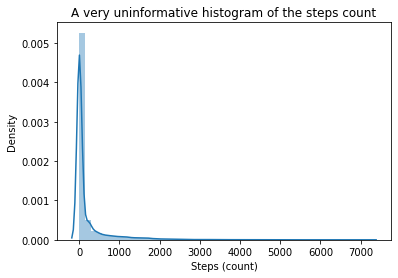

In [11]:
sns.distplot(user1_df['Steps (count)'])
plt.title("A very uninformative histogram of the steps count")

/mnt/c/Users/SerenaGao/Desktop/Uni/Data3406_Assignment2/venv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'A more informative distplot of the nonzero steps')

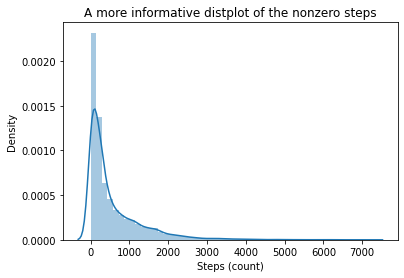

In [12]:
sns.distplot(user1_df[user1_df['Steps (count)'] != 0]['Steps (count)'])
plt.title("A more informative distplot of the nonzero steps")

The distplot including the zeroes is not very informative, but filtering out the zeroes makes it a little better. The steps seem to be more poisson distributed, which makes sense, but there is a rather long right tail, which will affect the significance of any hypothesis tests we do that assume parametric data.

---

## Time-Related Breakdowns

Now looking at some time-related breakdowns. We set up the data in preparation to aggregate by:
- year
- month
- week
- day
- day of week
- hour

Using the Start time as the basis for our timestamps makes more sense. 

First, defining some functions for plotting data to make it easier to explore.

In [74]:
def plot_scatterplot(df):
    plt.plot(df.index, df['mean'])
    plt.scatter(df.index, df['mean'])
    plt.ylabel("Average steps")
    plt.xlabel("Time")
    plt.title("Average steps")
    plt.grid()
    plt.show()


Creating some features that will allow us to aggregate easier:

In [87]:
user1_df['year'] = user1_df['Start'].dt.year
user1_df['month'] = user1_df['Start'].dt.month
user1_df['week'] = user1_df['Start'].dt.isocalendar().week
user1_df['day'] = user1_df['Start'].dt.day
user1_df['dayofweek'] = user1_df['Start'].dt.dayofweek
user1_df['hour'] = user1_df['Start'].dt.hour


In [76]:
steps_describe_columns = [('Steps (count)', 'count'), ('Steps (count)',  'mean'), ('Steps (count)',   'std'),
                          ('Steps (count)',   'min'), ('Steps (count)',   '25%'), ('Steps (count)',   '50%'), 
                          ('Steps (count)',   '75%'), ('Steps (count)',   'max')
                        ]

steps_aggs = {'Steps (count)': ['sum', 'mean', 'std', 'min', 'median', 'max', 'count']}

First, looking at year aggregations.



In [77]:
year_aggs = user1_df.groupby("year").agg(steps_aggs)
year_aggs.columns = [x[1] for x in year_aggs.columns]
year_aggs

,sum,mean,std,min,median,max,count
year,,,,,,,
2014,1.115900e+05,188.815567,495.522895,0.0,0.000000,3678.000000,591
2015,1.582732e+06,180.697797,517.354050,0.0,0.000000,6476.569805,8759
2016,1.634559e+06,186.104827,501.083499,0.0,0.000000,6052.441276,8783
2017,1.463320e+06,167.064733,492.293485,0.0,0.000000,6272.645042,8759
2018,1.866431e+06,213.087201,493.942794,0.0,0.000000,7204.611321,8759
2019,1.888807e+06,294.206647,589.012723,0.0,6.702548,5777.462429,6420


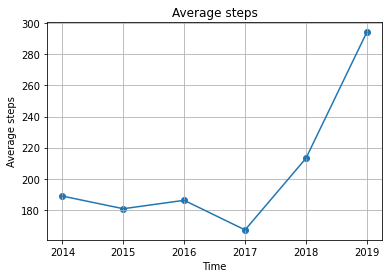

In [78]:
plot_scatterplot(year_aggs)

From the summary, we have full year's worth of data for 2015-2018, 691 days for 2014, and 6420 days for 2019. The mean steps taken per hour was highest in 2019, and lowest in 2017. Standard deviation was lowest in 2017, and highest in 2019.

This suggests that User 1 walked more steps on average in 2019, but had more variation in how much they walked per hour, whereas they walked the least steps on average in 2017, but were more consistent in that number. This may also be a function of the fewer data points in 2019.


---

Looking at aggregating by month

In [79]:
month_aggs = user1_df.groupby("month").agg(steps_aggs)
month_aggs.columns = [x[1] for x in month_aggs.columns]
month_aggs

,sum,mean,std,min,median,max,count
month,,,,,,,
1,744761.114803,200.204601,504.273415,0.0,0.0,6444.000000,3720
2,627560.340006,185.449273,478.116770,0.0,0.0,5241.669732,3384
3,931391.794740,250.374138,566.153040,0.0,0.0,6023.499884,3720
4,875194.491326,243.109581,555.893625,0.0,0.0,6476.569805,3600
5,606693.635922,163.089687,468.775422,0.0,0.0,6195.616054,3720
6,775956.000000,215.543333,574.587724,0.0,0.0,5873.330051,3600
7,921782.000000,247.790860,664.738524,0.0,0.0,6055.166833,3720
8,736871.000000,198.083602,487.165118,0.0,0.0,5214.052265,3720
9,590481.000000,170.265571,463.933524,0.0,0.0,6272.645042,3468


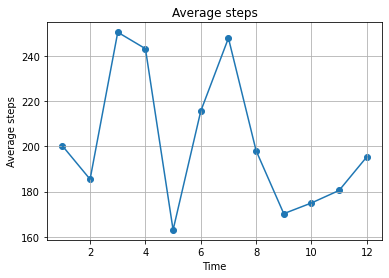

In [80]:
plot_scatterplot(month_aggs)

Spikey. 

The average steps per hour aggregated by month seems to suggest certain months have systematically higher levels of walking, such as March, April, and July, and lower levels of walking such as September - November. 

---

Looking at aggregating by week now

In [81]:
week_aggs = user1_df.groupby("week").agg(steps_aggs)
week_aggs.columns = [x[1] for x in week_aggs.columns]
week_aggs

,sum,mean,std,min,median,max,count
week,,,,,,,
1,159691.018786,190.108356,470.578745,0.0,0.0,3917.245696,840
2,191406.525689,227.864912,491.638966,0.0,0.0,3866.168899,840
3,151858.652796,180.784110,466.946471,0.0,0.0,4273.000000,840
4,173310.446406,206.321960,573.509584,0.0,0.0,6444.000000,840
5,184310.698686,219.417498,591.571387,0.0,0.0,5241.669732,840
6,146811.068054,174.775081,443.565962,0.0,0.0,3962.328963,840
7,140834.626750,167.660270,444.085200,0.0,0.0,3545.000000,840
8,146337.992778,174.211896,429.016416,0.0,0.0,3289.000000,840
9,190201.594168,226.430469,523.903885,0.0,0.0,4178.738385,840


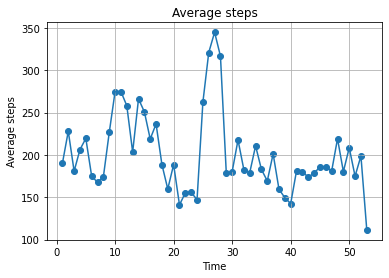

In [82]:
plot_scatterplot(week_aggs)

Breaking the step counts down by week of the year, it looks like certain weeks of the year have higher average step counts per hour (peaking at 350 steps) compared to others (e.g. 150 steps). They seem more varied in the earlier weeks of the year compared to later, and become more stable in later weeks before dropping off. No discernible trends which aren't explained by month already.

---
Aggregating by day of week, we use `dayofweek()` where Monday = 0 and Sunday = 6.




In [88]:
dow_aggs = user1_df.groupby("dayofweek").agg(steps_aggs)
dow_aggs.columns = [x[1] for x in dow_aggs.columns]
dow_aggs 

,sum,mean,std,min,median,max,count
dayofweek,,,,,,,
0,1.168919e+06,194.043589,509.428204,0.0,0.0,5769.000000,6024
1,1.189750e+06,197.501639,491.770749,0.0,0.0,6272.645042,6024
2,1.299812e+06,216.203003,535.789291,0.0,0.0,6055.166833,6012
3,1.329376e+06,221.562665,530.524977,0.0,0.0,7204.611321,6000
4,1.329018e+06,221.502940,521.759929,0.0,0.0,5423.273163,6000
5,1.046901e+06,174.483537,515.289055,0.0,0.0,6444.000000,6000
6,1.183662e+06,196.916056,513.098491,0.0,0.0,6476.569805,6011


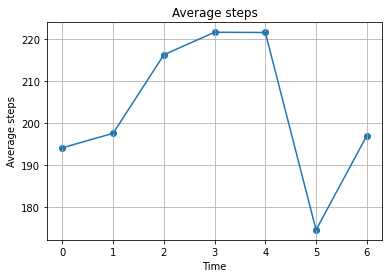

In [89]:
plot_scatterplot(dow_aggs)

From the graph, it certainly seems like User 1 walks increasingly more as the week goes on, and then sharply drops off during the weekend. A potential explanation would be that the user works Mon-Fri, and so remembers to exercise during the workweek, and then stays at home during the weekend. This does give a lot of insight into the habits of the user. 

---

Now examining by hour

In [90]:
hour_aggs = user1_df.groupby("hour").agg(steps_aggs)
hour_aggs.columns = [x[1] for x in hour_aggs.columns]
hour_aggs 

,sum,mean,std,min,median,max,count
hour,,,,,,,
0,99191.034272,56.583591,298.144179,0.0,0.000000,4112.889022,1753
1,120662.729550,68.832133,362.724302,0.0,0.000000,5716.821371,1753
2,113250.652023,64.751659,322.903802,0.0,0.000000,6053.737707,1749
3,141353.544622,80.635222,396.392945,0.0,0.000000,4838.945689,1753
4,130494.615958,74.440739,356.741978,0.0,0.000000,5057.785598,1753
5,125396.699008,71.532629,395.412857,0.0,0.000000,5769.000000,1753
6,144368.358298,82.355025,361.163701,0.0,0.000000,5873.330051,1753
7,253169.637969,144.420786,440.614590,0.0,0.000000,4881.000000,1753
8,399095.817454,227.664471,618.491285,0.0,0.000000,7204.611321,1753


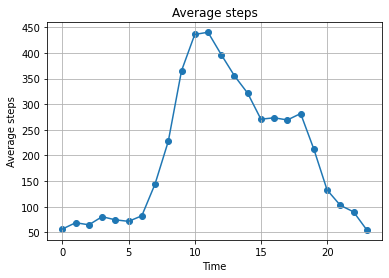

In [91]:
plot_scatterplot(hour_aggs)

When we see the hourly breakdown, it becomes clearer what the user's schedule looks like. They wake up sometime around 7am, and steadily increase their wakling until 10am (at 450 steps), and then steadily decrease from there, plateauing from 3pm to 6pm before falling sharply. 

It's also worth noting that step counts hover around 50-100 from the hours of 10pm to 6am, but don't quite dip to zero, suggesting that there may be calibration issues with the step measurements, or that the person genuinely does not sleep. 

---

## Examining the Same for User 2

We will now examine the same measures for User 2. First, using what we learnt from user 1 to code up some auto-cleaning functions

In [108]:
def clean_user(raw_df):
    raw_df['Start'] = pd.to_datetime(raw_df['Start'], format='%d-%b-%Y %H:%M')
    raw_df['Finish'] = pd.to_datetime(raw_df['Finish'], format='%d-%b-%Y %H:%M')
    start_counts = raw_df['Start'].value_counts()
    multicounts = start_counts[start_counts > 1]
    
    raw_df = raw_df[~ (raw_df['Start'].isin(multicounts.index.values) & 
        raw_df['Finish'].isin(multicounts.index.values) )]
    
    return raw_df

In [109]:
user2_df = clean_user(user2_raw_data)
user2_df

,Start,Finish,Steps (count)
0,2014-11-29 00:00:00,2014-11-29 01:00:00,502.666667
1,2014-11-29 01:00:00,2014-11-29 02:00:00,502.666667
2,2014-11-29 02:00:00,2014-11-29 03:00:00,502.666667
3,2014-11-29 03:00:00,2014-11-29 04:00:00,502.666667
4,2014-11-29 04:00:00,2014-11-29 05:00:00,502.666667
...,...,...,...
42272,2019-09-25 07:00:00,2019-09-25 08:00:00,0.000000
42273,2019-09-25 08:00:00,2019-09-25 09:00:00,0.000000
42274,2019-09-25 09:00:00,2019-09-25 10:00:00,31.000000
42275,2019-09-25 10:00:00,2019-09-25 11:00:00,418.000000


One immediate observation from seeing the head is just how much the same step count repeats over multiple hours. While it's not impossible that the user has walked exactly 502.667 steps per hour from 1am to sometime after 5am, it does seem highly improbable. 

One potential explanation for this based on personal observation and experience with the QS App is that step data stored by Apple are recorded in non-binned form, so if the time block takes up more than an hour, they will divide it evenly over the hour increment. So it's possible that their phone recorded a high step count while the person is sleeping, and then spread it evenly across the full timeblock instead of attributing it to a specific hour. 
**This is a behaviour which will definitely intefere with analysis, and will need to be identified and dealt with**

In [110]:
user2_df.describe()

,Steps (count)
count,42272.000000
mean,415.899515
std,726.094524
min,0.000000
25%,0.000000
50%,177.878115
75%,479.318182
max,7261.816867


In [111]:
user2_df[['Start', 'Finish']].describe()

/mnt/c/Users/SerenaGao/Desktop/Uni/Data3406_Assignment2/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/mnt/c/Users/SerenaGao/Desktop/Uni/Data3406_Assignment2/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Start,Finish
count,42272,42272
unique,42272,42272
top,2017-05-31 04:00:00,2017-05-31 04:00:00
freq,1,1
first,2014-11-29 00:00:00,2014-11-29 01:00:00
last,2019-09-25 11:00:00,2019-09-25 12:00:00


We have already dealt with the Daylight Savings duplicate time issue in our cleaning function, so thankfully the most frequent date only has a frequency of 1. This dataset has 42272 rows, and also spans around 5 years of data. 



/mnt/c/Users/SerenaGao/Desktop/Uni/Data3406_Assignment2/venv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot of the nonzero steps - User 2')

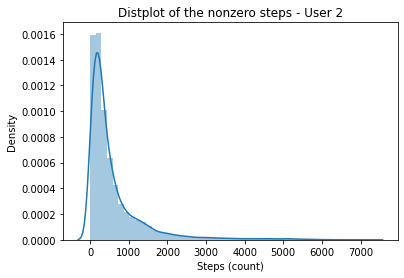

In [113]:
sns.distplot(user2_df[user2_df['Steps (count)'] != 0]['Steps (count)'])
plt.title("Distplot of the nonzero steps - User 2")

We're seeing a trend that user steps will definitely be very right skewed, with most step counts being closer to zero. We may need to use a threshold to indicate the times that a person actually walked, or if it was likely due to random chance or other movements-- e.g. can picking up your phone be misconstrued as a step? 

Now we'll make a function that adds our extra time-related features and a function that plots our averages for reusability

In [119]:
def add_time_features(df):
    df = df.copy()
    df['year'] = df['Start'].dt.year
    df['month'] = df['Start'].dt.month
    df['week'] = df['Start'].dt.isocalendar().week
    df['day'] = df['Start'].dt.day
    df['dayofweek'] = df['Start'].dt.dayofweek
    df['hour'] = df['Start'].dt.hour
    
    return df

def display_mean_plot(df, mode):
    aggs = df.groupby(mode).agg(steps_aggs)
    aggs.columns = [x[1] for x in aggs.columns]
    
    plot_scatterplot(aggs)

In [118]:
user2_df = add_time_features(user2_df)
user2_df

,Start,Finish,Steps (count),year,month,week,day,dayofweek,hour
0,2014-11-29 00:00:00,2014-11-29 01:00:00,502.666667,2014,11,48,29,5,0
1,2014-11-29 01:00:00,2014-11-29 02:00:00,502.666667,2014,11,48,29,5,1
2,2014-11-29 02:00:00,2014-11-29 03:00:00,502.666667,2014,11,48,29,5,2
3,2014-11-29 03:00:00,2014-11-29 04:00:00,502.666667,2014,11,48,29,5,3
4,2014-11-29 04:00:00,2014-11-29 05:00:00,502.666667,2014,11,48,29,5,4
...,...,...,...,...,...,...,...,...,...
42272,2019-09-25 07:00:00,2019-09-25 08:00:00,0.000000,2019,9,39,25,2,7
42273,2019-09-25 08:00:00,2019-09-25 09:00:00,0.000000,2019,9,39,25,2,8
42274,2019-09-25 09:00:00,2019-09-25 10:00:00,31.000000,2019,9,39,25,2,9
42275,2019-09-25 10:00:00,2019-09-25 11:00:00,418.000000,2019,9,39,25,2,10


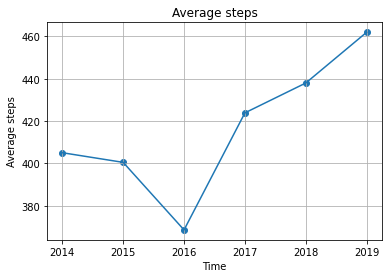

In [120]:
display_mean_plot(user2_df, 'year')

This user has a slightly different pattern: their average step count aggregated over the year almost steadily climbs up every year, with a very low dip in 2016 where they didn't walk much-- though it's possible this is due to a lack of use/records rather than a lack of steps. 

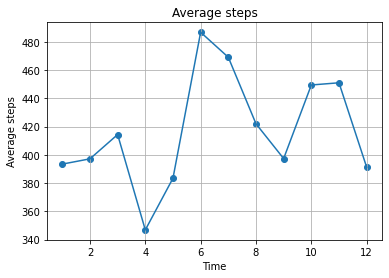

In [121]:
display_mean_plot(user2_df, 'month')

Aggregating by month, we also see a spike in step count around June and July. If we had more knowledge on the users, perhaps this could be attributed to school holidays, and hence more opportunity for walking during vacation/break. 



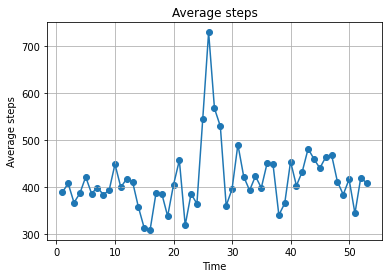

In [122]:
display_mean_plot(user2_df, 'week')

As I'm doing these graphs, it becomes apparent to me that I have very little knowledge of the user themselves, and hence what could be possible reasons for the data that we see. There's a very clear spike around week 26, which happens to be exactly in the middle of the year, but otherwise the steps also trend upwards as the year progresses. 

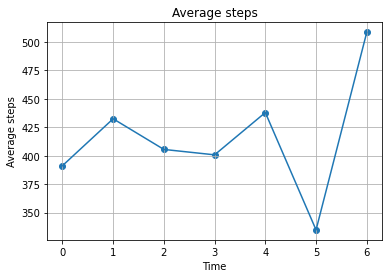

In [123]:
display_mean_plot(user2_df, 'dayofweek')

Here, we see a slightly different trend. User 2 appears to walk consistently over the week, with the exception of Saturday where they walk much less than usual, and Sunday, where they walk more than usual. 



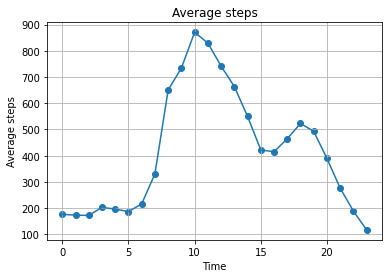

In [124]:
display_mean_plot(user2_df, 'hour')

Aggregating by hour, steps build up until 10am, where it peaks at close to 1000 steps and drops until 3pm, where it rises until 6pm and falls again. For this user, their base level of activity seems to be around 200 (looking at midnight to 5am), which may be related to the time-block issue we saw before. We can potentially attribute those steps to the next hour that doesn't match the repeated step counts, or use it as a baseline or threshold for what constitutes as "active steps"

## Identifying anomalous days of exercise

From human experience, we aren't always consistent with our walking. The goal here is to do some exploration and see if there are particular days which the user walked more in, and identify outliers in the data.

Here, we will sum up data over each month and plot the steps over time to see if there is a trend in more aggregated data.

In [127]:
user2_df = user2_df.set_index('Start')
user2_df

,Finish,Steps (count),year,month,week,day,dayofweek,hour
Start,,,,,,,,
2014-11-29 00:00:00,2014-11-29 01:00:00,502.666667,2014,11,48,29,5,0
2014-11-29 01:00:00,2014-11-29 02:00:00,502.666667,2014,11,48,29,5,1
2014-11-29 02:00:00,2014-11-29 03:00:00,502.666667,2014,11,48,29,5,2
2014-11-29 03:00:00,2014-11-29 04:00:00,502.666667,2014,11,48,29,5,3
2014-11-29 04:00:00,2014-11-29 05:00:00,502.666667,2014,11,48,29,5,4
...,...,...,...,...,...,...,...,...
2019-09-25 07:00:00,2019-09-25 08:00:00,0.000000,2019,9,39,25,2,7
2019-09-25 08:00:00,2019-09-25 09:00:00,0.000000,2019,9,39,25,2,8
2019-09-25 09:00:00,2019-09-25 10:00:00,31.000000,2019,9,39,25,2,9


Text(0.5, 1.0, 'Total steps taken per month over time (User2)')

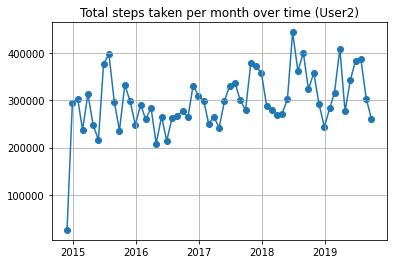

In [140]:
monthly_year_agg = user2_df.resample("M").sum()
plt.plot(monthly_year_agg.index, monthly_year_agg['Steps (count)'])
plt.scatter(monthly_year_agg.index, monthly_year_agg['Steps (count)'])
plt.grid()
plt.title("Total steps taken per month over time (User2)")

Summing steps over the month, it seems like for the most part User2 was very consistent in how they walked, with a slight trend upwards as the years progressed. 

So now we look at per-week data:

Text(0.5, 1.0, 'Total steps taken per week over time (User2)')

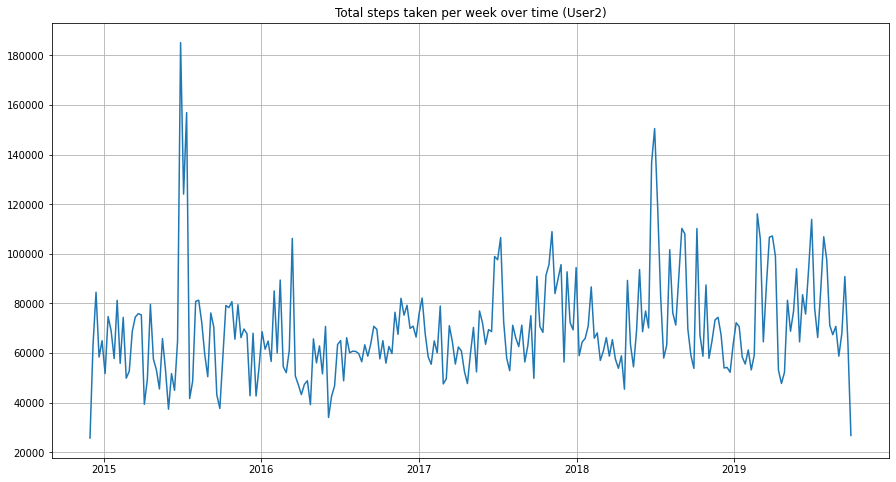

In [141]:
plt.figure(figsize=(15,8))
weekly_year_agg = user2_df.resample("W").sum()
plt.plot(weekly_year_agg.index, weekly_year_agg['Steps (count)'])

plt.grid()
plt.title("Total steps taken per week over time (User2)")

Now there are definitely more outliers, around the middle of the years 2015, 2017, and 2018. These figures would definitely skew our average-based measures, so we may want to deal with these in some appropriate way.

Looking at daily steps now...

Text(0.5, 1.0, 'Total steps taken per day over time (User2)')

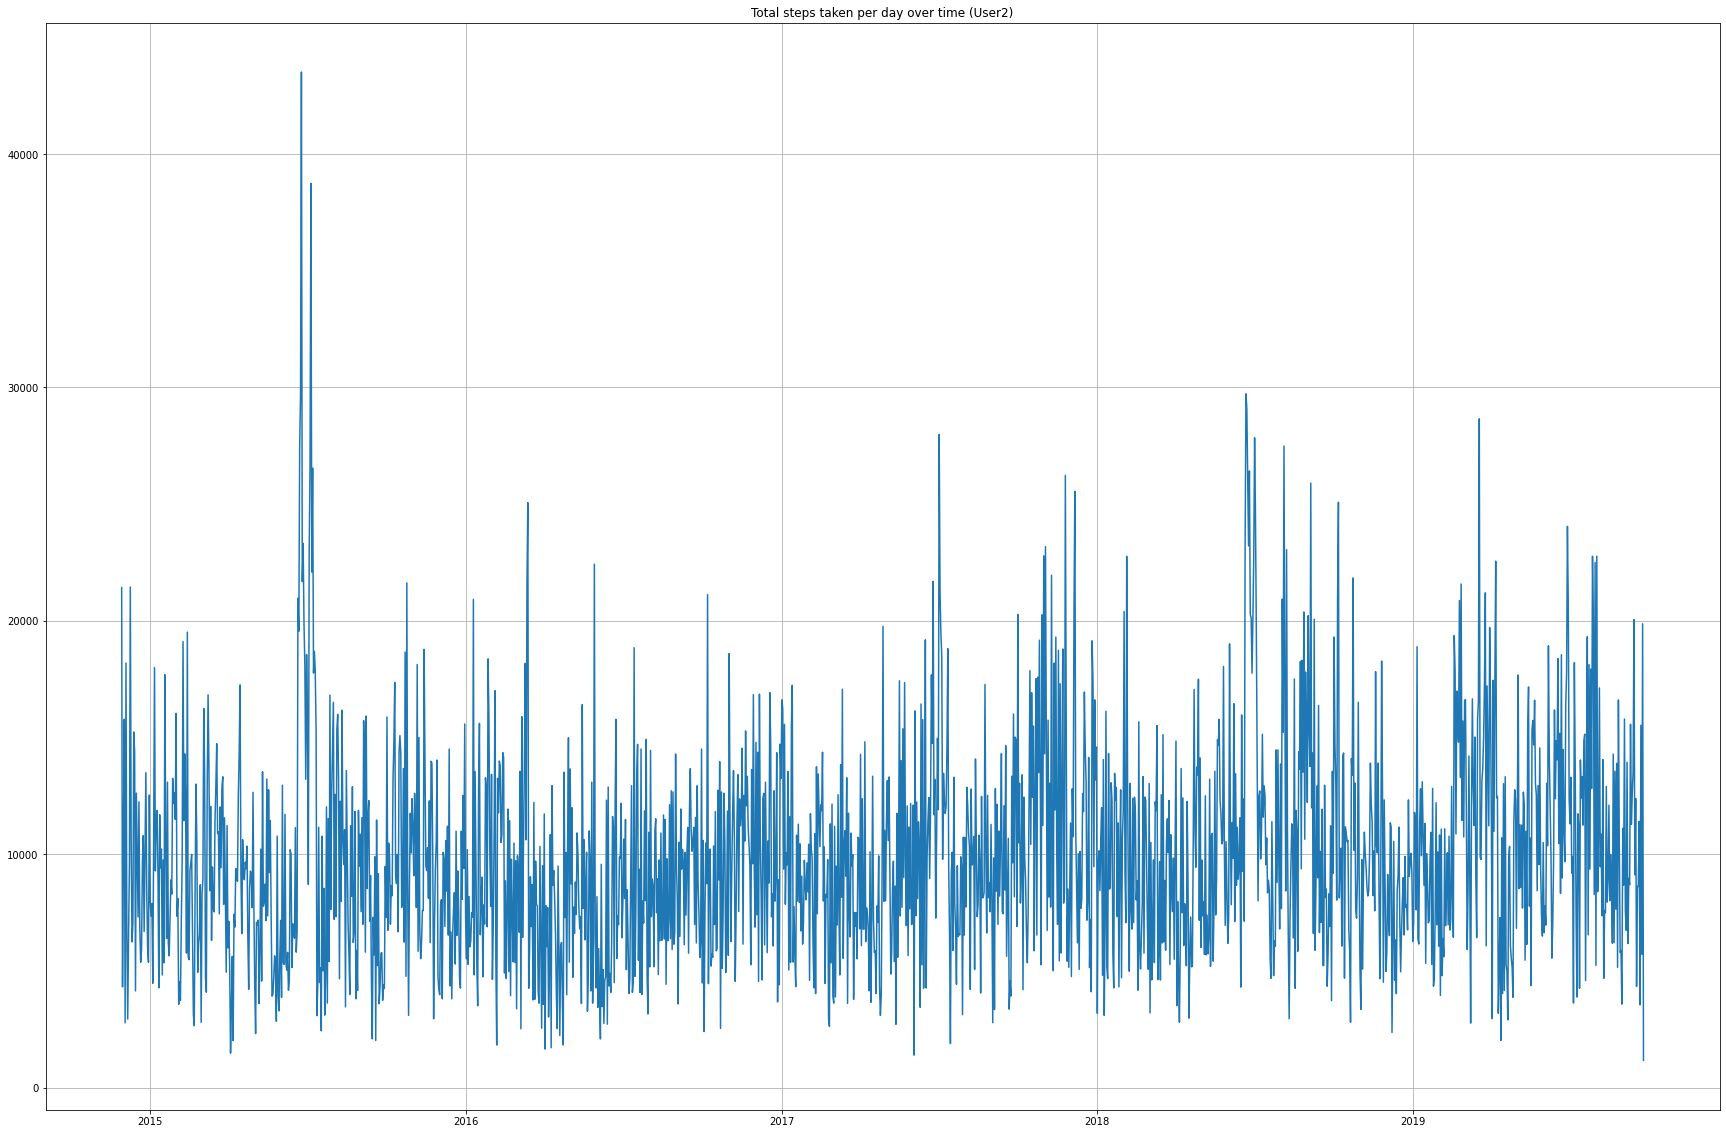

In [151]:
plt.figure(figsize=(30,20))
daily_year_agg = user2_df.resample("D").sum()
plt.plot(daily_year_agg.index, daily_year_agg['Steps (count)'])

plt.grid()
plt.title("Total steps taken per day over time (User2)")

So this is aggregated daily step count for User 2, and some of the numbers start seeming a bit suss. E.g. At it's peak, there was 40,000 steps in one day, which translates to roughly 30km. Whilst not impossible (there are 30km walks you can do), it does seem to suggest that the person is very fit. 

---

## Cross-Referencing with User 1

We'll cross-reference with User1 to see if we get similar step counts

Text(0.5, 1.0, 'Total steps taken per month over time (User1)')

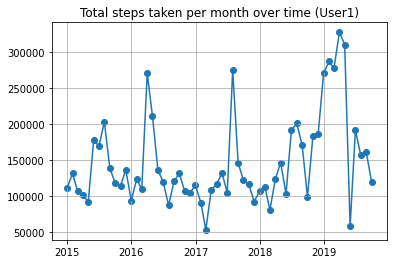

In [152]:

monthly_year_agg1 = user1_df.resample("M", on='Start').sum()
plt.plot(monthly_year_agg1.index, monthly_year_agg1['Steps (count)'])
plt.scatter(monthly_year_agg1.index, monthly_year_agg1['Steps (count)'])
plt.grid()
plt.title("Total steps taken per month over time (User1)")

Text(0.5, 1.0, 'Total steps taken per week over time (User1)')

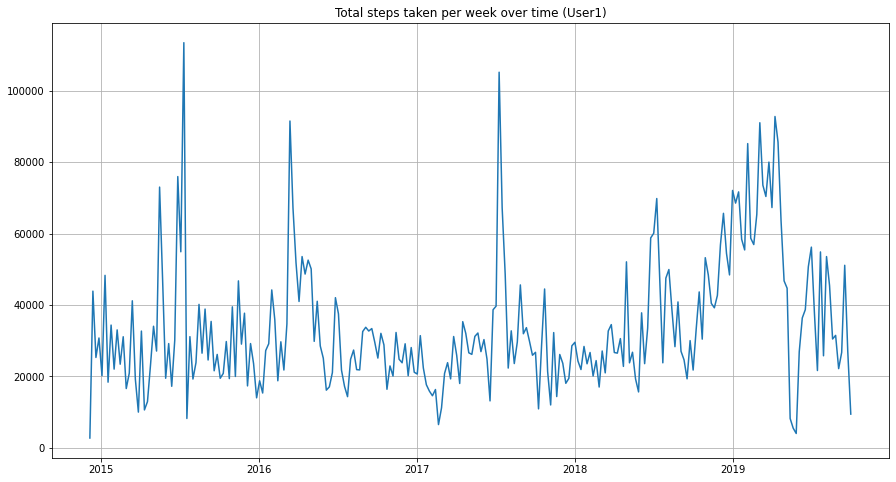

In [153]:
plt.figure(figsize=(15,8))

weekly_year_agg1 = user1_df.resample("W",  on='Start').sum()
plt.plot(weekly_year_agg1.index, weekly_year_agg1['Steps (count)'])

plt.grid()
plt.title("Total steps taken per week over time (User1)")

Text(0.5, 1.0, 'Total steps taken per day over time (User1)')

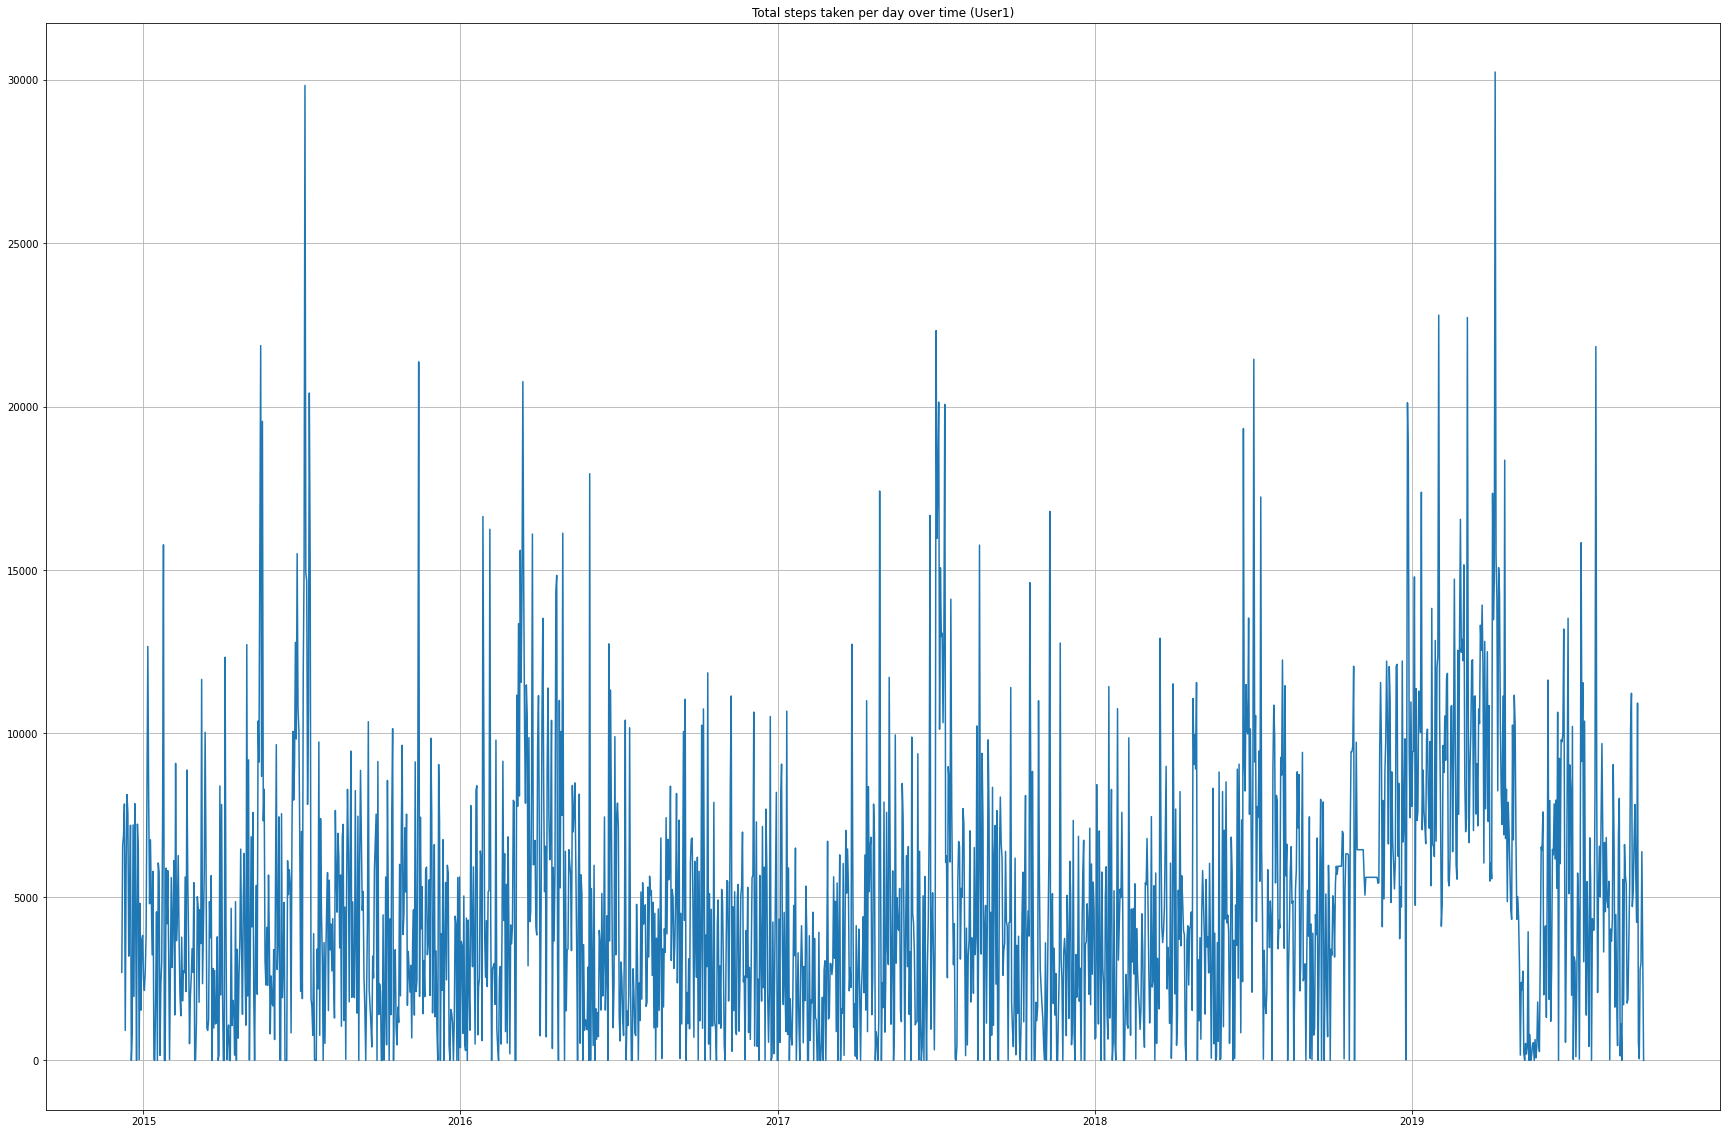

In [154]:
plt.figure(figsize=(30,20))
daily_year_agg1 = user1_df.resample("D", on='Start').sum()
plt.plot(daily_year_agg1.index, daily_year_agg1['Steps (count)'])

plt.grid()
plt.title("Total steps taken per day over time (User1)")

And yeah, User1 definitely has a lower baseline of stepcount compared to User2 (so my analysis has been correctly implemented). The seem to have picked up the steps from 2018 to 2019 (perhaps training for a 30k steps run?), but then sharply dropped off (injury?) for a few months. 